In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv('df_arabica_clean.csv')
df = df.drop(columns=['ICO Number', 'Unnamed: 0', 'ID', 'Sweetness', 'Clean Cup', 'Defects', 'Uniformity'])
df = df.fillna('N/A')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country of Origin      207 non-null    object 
 1   Farm Name              207 non-null    object 
 2   Lot Number             207 non-null    object 
 3   Mill                   207 non-null    object 
 4   Company                207 non-null    object 
 5   Altitude               207 non-null    object 
 6   Region                 207 non-null    object 
 7   Producer               207 non-null    object 
 8   Number of Bags         207 non-null    int64  
 9   Bag Weight             207 non-null    object 
 10  In-Country Partner     207 non-null    object 
 11  Harvest Year           207 non-null    object 
 12  Grading Date           207 non-null    object 
 13  Owner                  207 non-null    object 
 14  Variety                207 non-null    object 
 15  Status

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Number of Bags to Category Two Defects
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number of Bags        13 non-null     float64
 1   Aroma                 13 non-null     float64
 2   Flavor                13 non-null     float64
 3   Aftertaste            13 non-null     float64
 4   Acidity               13 non-null     float64
 5   Body                  13 non-null     float64
 6   Balance               13 non-null     float64
 7   Overall               13 non-null     float64
 8   Total Cup Points      13 non-null     float64
 9   Moisture Percentage   13 non-null     float64
 10  Category One Defects  13 non-null     float64
 11  Quakers               13 non-null     float64
 12  Category Two Defects  13 non-null     float64
dtypes: float64(13)
memory usage: 2.0+ KB


/var/folders/3t/s31r6vgj44n_g5t4csrvklwh0000gn/T/ipykernel_16016/514138641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

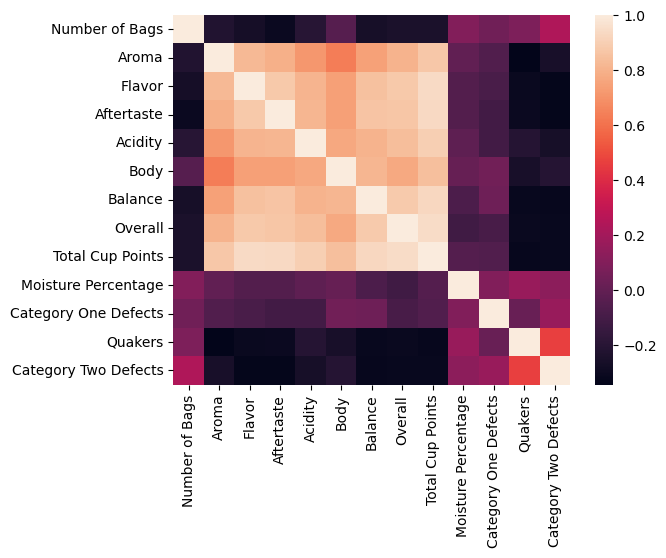

In [99]:
corr = df.corr()

corr.info()

sns.heatmap(corr)

In [100]:
flav_metrics = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']
keep_cols = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Country of Origin']
df = df[keep_cols]
X = df[flav_metrics]
y = df['Country of Origin']

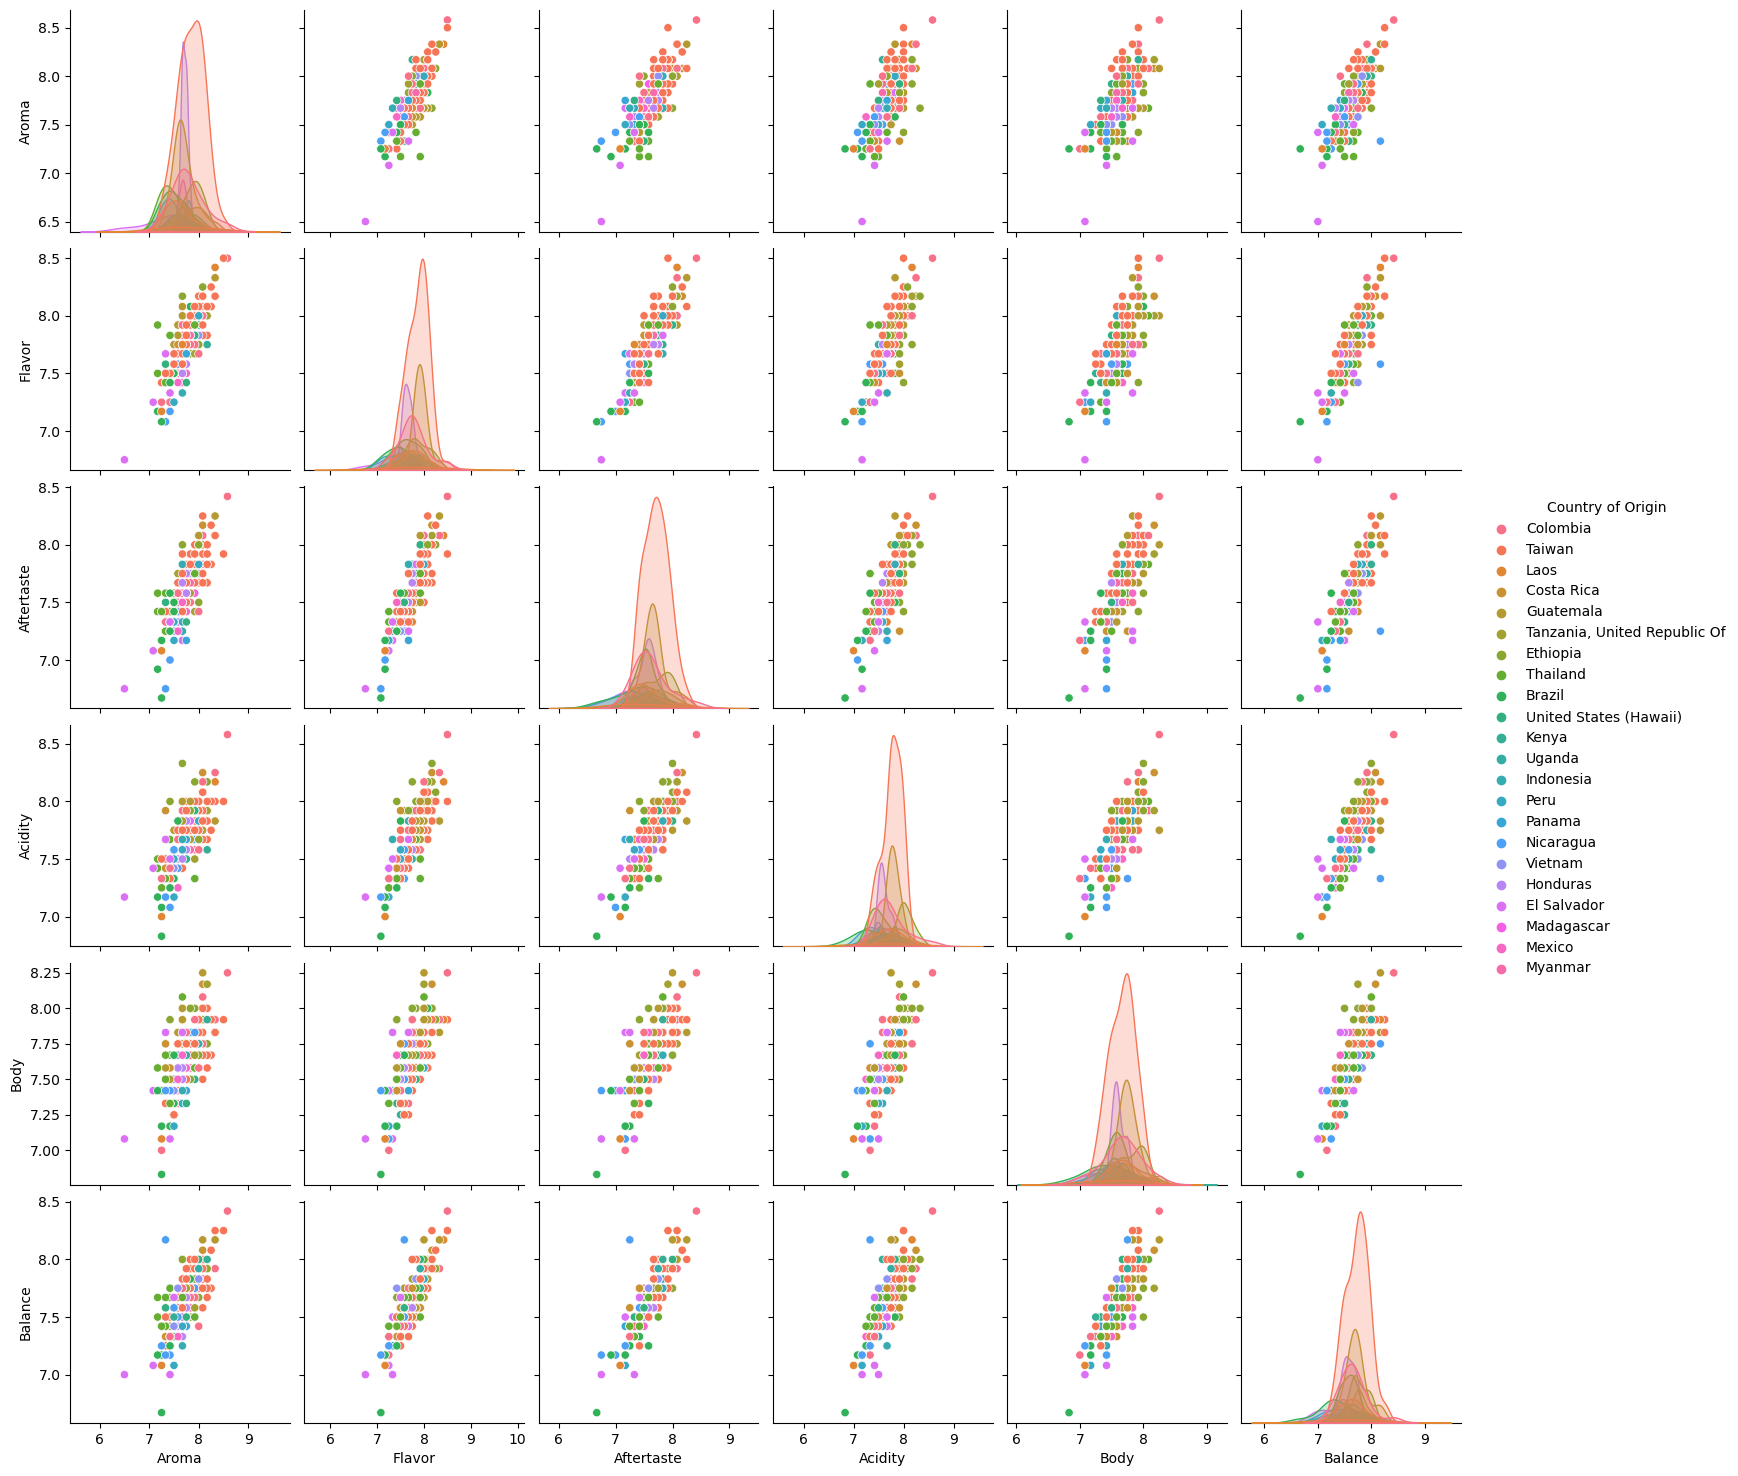

In [101]:
sns.pairplot(df, hue='Country of Origin')

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


[0.3076923076923077, 0.19230769230769232, 0.28846153846153844, 0.3269230769230769, 0.3269230769230769, 0.2692307692307692, 0.23076923076923078, 0.28846153846153844, 0.28846153846153844, 0.3076923076923077, 0.3269230769230769, 0.28846153846153844, 0.3076923076923077, 0.3269230769230769, 0.34615384615384615, 0.34615384615384615, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.36538461538461536, 0.34615384615384615, 0.3269230769230769, 0.3076923076923077, 0.28846153846153844, 0.3269230769230769, 0.3076923076923077, 0.3269230769230769, 0.3269230769230769, 0.34615384615384615]
Neighbors: 21, Accuracy: 0.36538461538461536


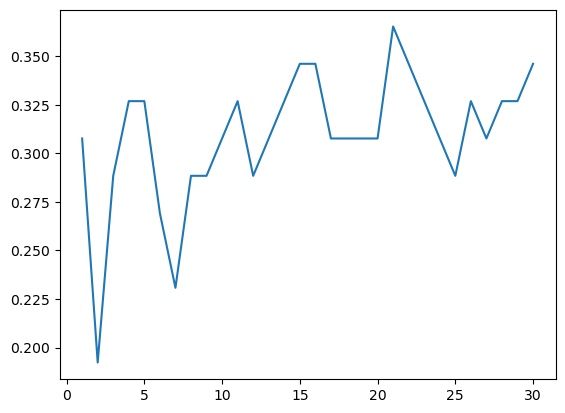

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
neighbors = []
accs = []

for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train, y_train)

    pred = knn.predict(X_test)
    neighbors.append(i)
    accs.append(accuracy_score(y_test, pred))

print(accs)

sns.lineplot(x=neighbors, y=accs)

max_acc = max(accs)

print(f"Neighbors: {neighbors[accs.index(max_acc)]}, Accuracy: {max_acc}")

Estimators: 191, Accuracy: 0.38461538461538464


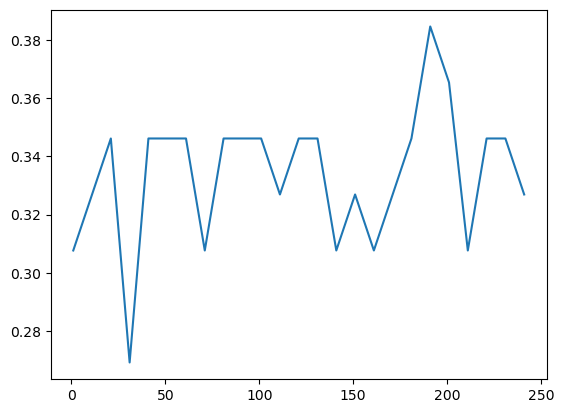

In [104]:
from sklearn.ensemble import RandomForestClassifier

ests = []
accs = []

for i in range(1, 251, 10):
    rfc = RandomForestClassifier(n_estimators=i)

    rfc.fit(X_train, y_train)

    pred = rfc.predict(X_test)

    ests.append(i)
    accs.append(accuracy_score(y_test, pred))

sns.lineplot(x=ests, y=accs)

max_acc = max(accs)

print(f"Estimators: {ests[accs.index(max_acc)]}, Accuracy: {max_acc}")

In [105]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

pred = svc.predict(X_test)

accuracy_score(y_test, pred)

0.28846153846153844

In [106]:
from sklearn.model_selection import GridSearchCV

svc_model = SVC()

param_grid = {
    'C': [1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

search = GridSearchCV(estimator=svc_model, param_grid=param_grid, scoring='f1', cv=5, verbose=True)

search.fit(X_train, y_train)
search.best_params_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/derek/opt/anaconda3/lib/python3.

{'C': 1, 'kernel': 'rbf'}

In [108]:
svc_model = SVC(C=1, kernel='rbf')

svc_model.fit(X_train, y_train)

pred = svc_model.predict(X_test)

accuracy_score(y_test, pred)

0.28846153846153844